In [3]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib

# Importing additional libraries for advanced tasks
try:
    import plotly.express as px
    import imblearn
    from feature_engine import imputation
    import xgboost as xgb
    import lightgbm as lgb
    import catboost as cb
    import missingno as msno
    import statsmodels.api as sm
except ImportError:
    print("Optional libraries not installed. Install them if needed.")

# All libraries are now ready to use
print("Libraries imported successfully!")

# Importing the warnings library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("Warnings will now be ignored!")

Libraries imported successfully!
Warnings will now be ignored!


In [5]:
# Load the cleaned datasets
cleaned_diabetic_data = pd.read_csv("cleaned_diabetic_data.csv")
cleaned_IDS_mapping = pd.read_csv("cleaned_IDS_mapping.csv")

# Display a summary of the loaded datasets
print("\n--- Cleaned Diabetic Data ---\n")
print(cleaned_diabetic_data.info())
print(cleaned_diabetic_data.head())

print("\n--- Cleaned IDS Mapping Data ---\n")
print(cleaned_IDS_mapping.info())
print(cleaned_IDS_mapping.head())


--- Cleaned Diabetic Data ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   encounter_id                101766 non-null  int64 
 1   patient_nbr                 101766 non-null  int64 
 2   race                        101766 non-null  object
 3   gender                      101766 non-null  object
 4   age                         101766 non-null  int64 
 5   weight                      101766 non-null  object
 6   admission_type_id           101766 non-null  int64 
 7   discharge_disposition_id    101766 non-null  int64 
 8   admission_source_id         101766 non-null  int64 
 9   time_in_hospital            101766 non-null  int64 
 10  payer_code                  101766 non-null  object
 11  medical_specialty           101766 non-null  object
 12  num_lab_procedures          101766 non-null  int64 
 1

In [7]:
cleaned_diabetic_data.isna().sum()

encounter_id                      0
patient_nbr                       0
race                              0
gender                            0
age                               0
weight                            0
admission_type_id                 0
discharge_disposition_id          0
admission_source_id               0
time_in_hospital                  0
payer_code                        0
medical_specialty                 0
num_lab_procedures                0
num_procedures                    0
num_medications                   0
number_outpatient                 0
number_emergency                  0
number_inpatient                  0
diag_1                            0
diag_2                            0
diag_3                            0
number_diagnoses                  0
max_glu_serum                 96420
A1Cresult                     84748
metformin                         0
repaglinide                       0
nateglinide                       0
chlorpropamide              


--- Target Variable Analysis: 'readmitted' ---

readmitted
Not Readmitted    54864
Readmitted        46902
Name: count, dtype: int64


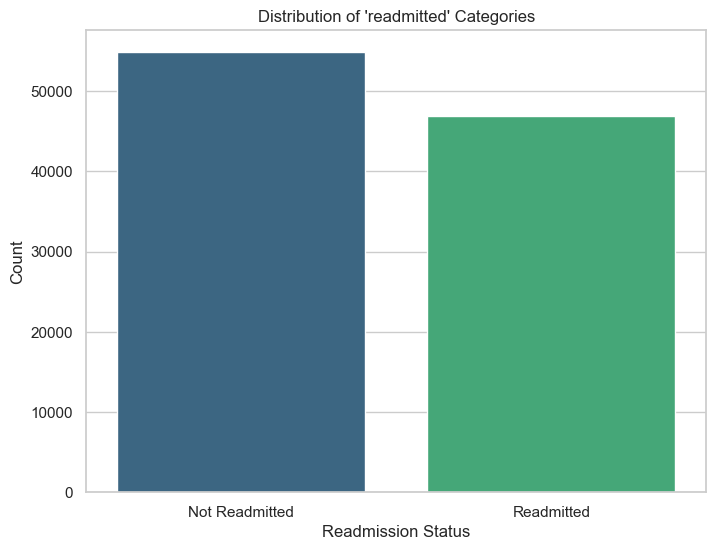

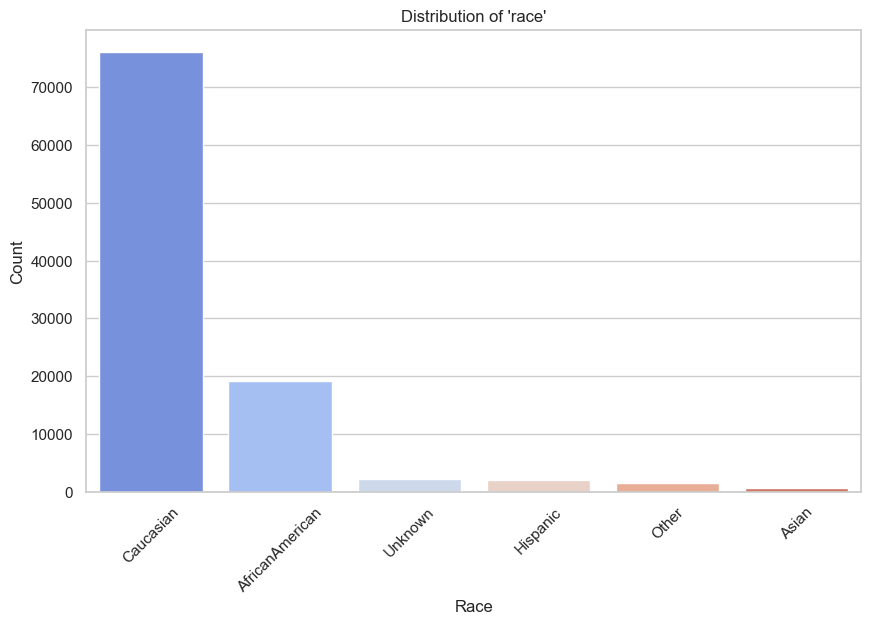

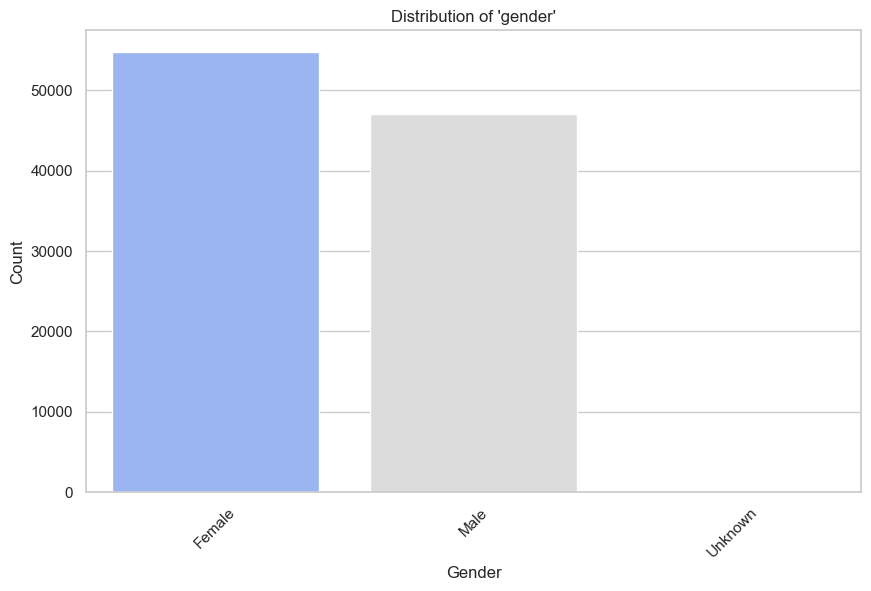

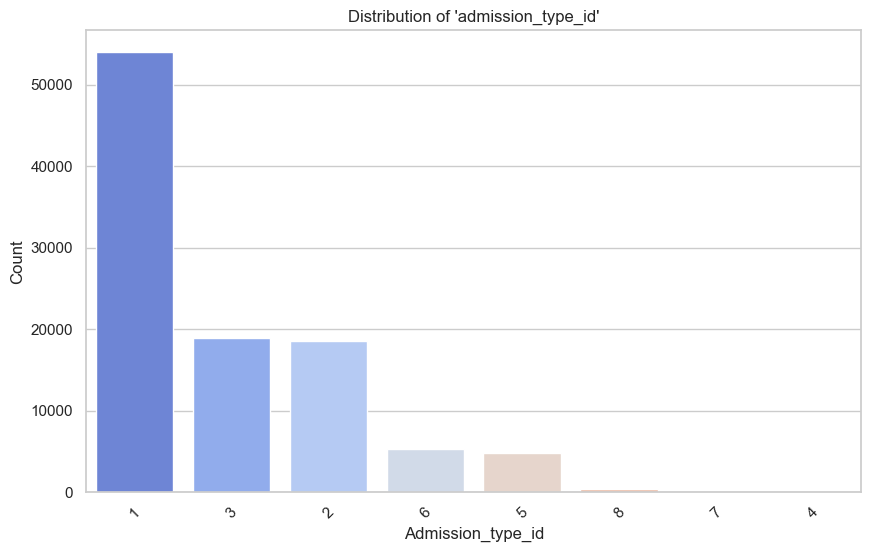

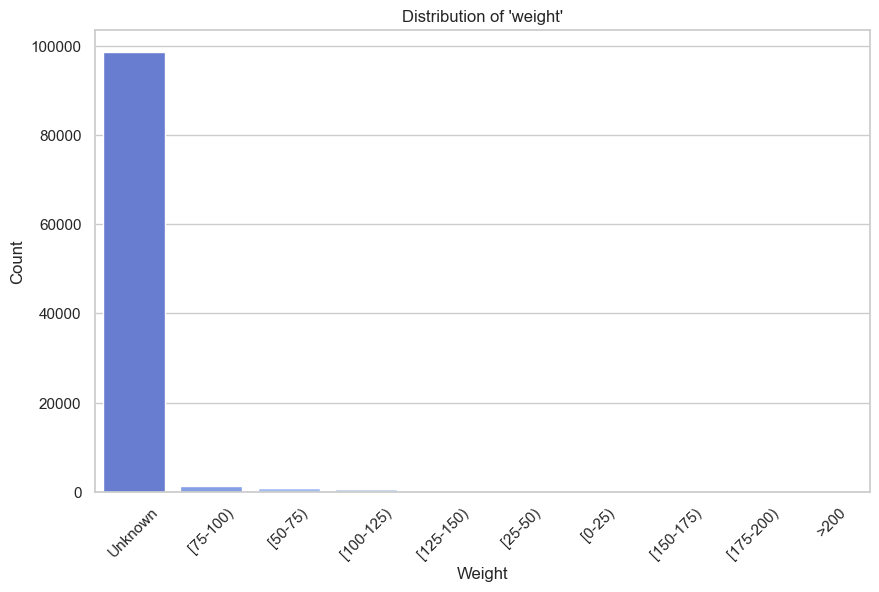

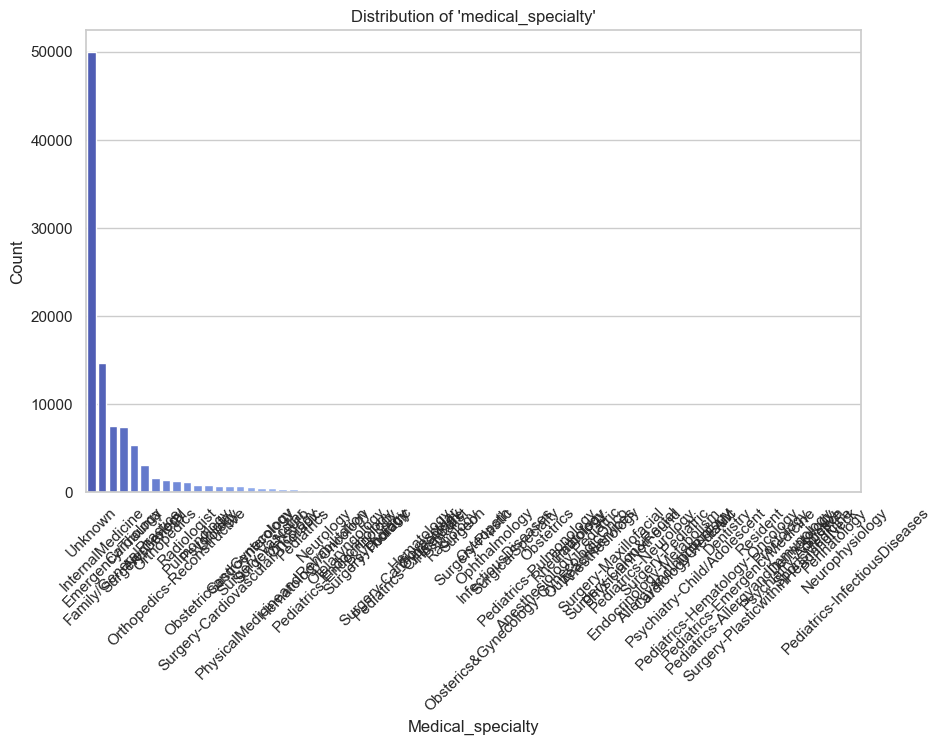

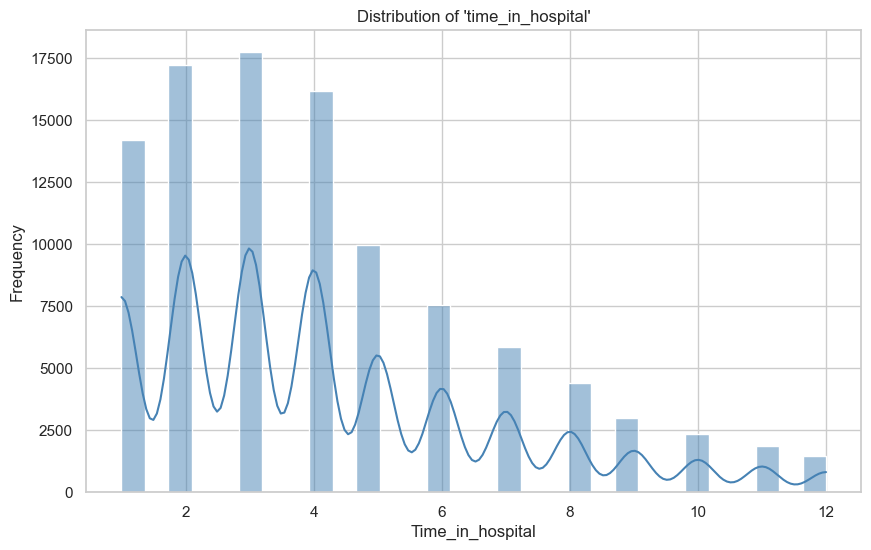

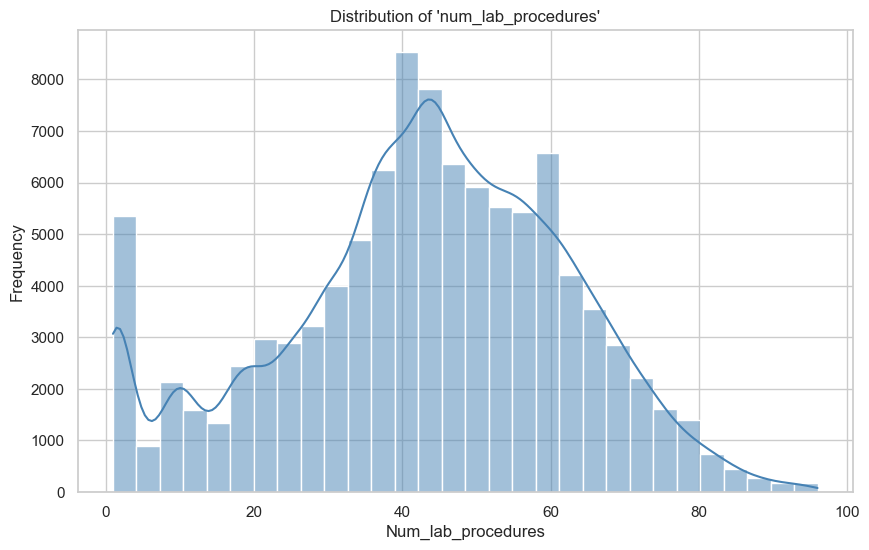

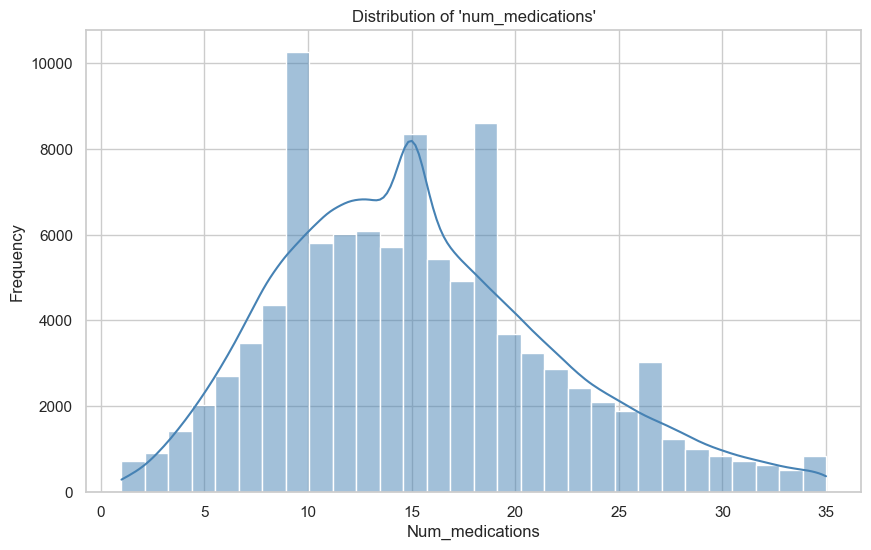

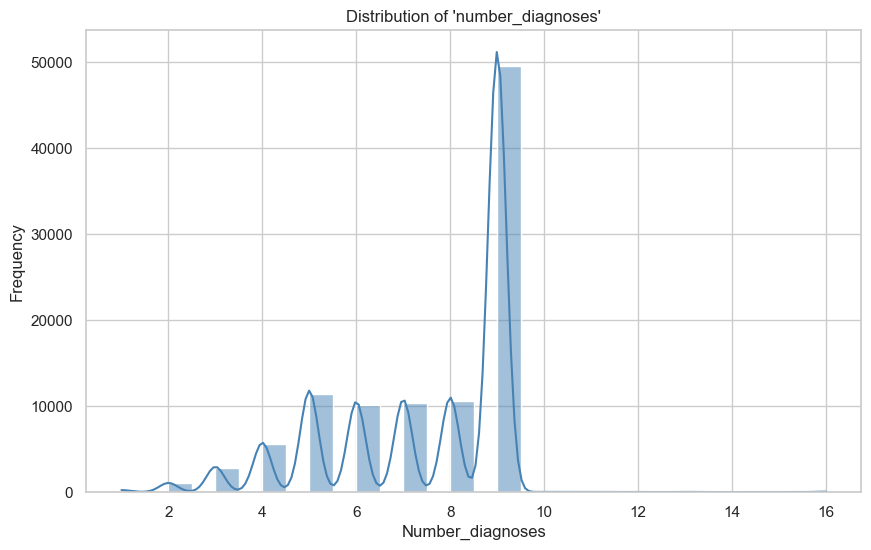

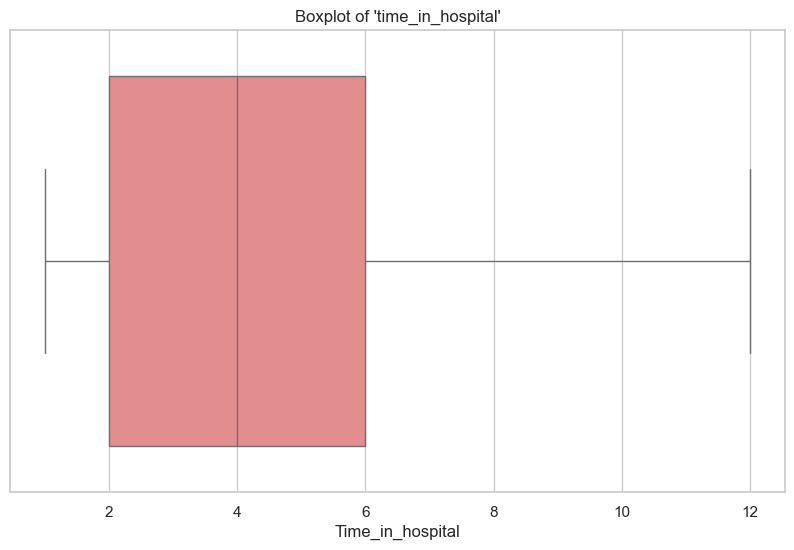

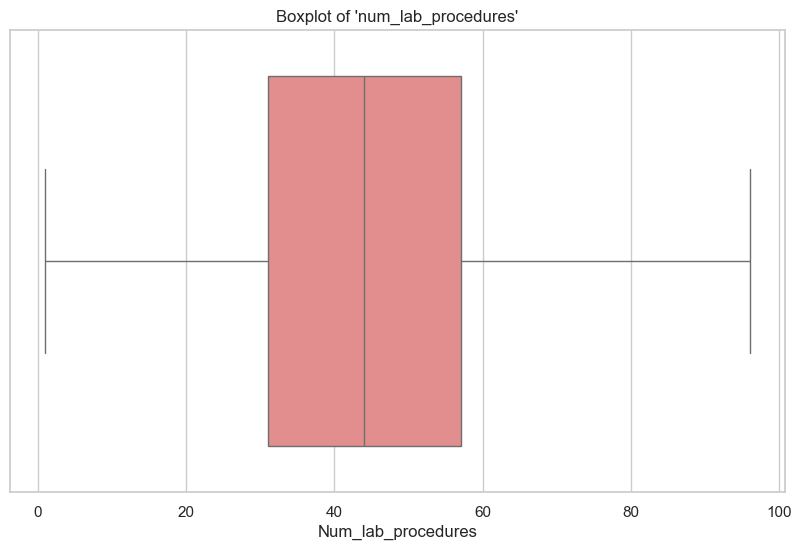

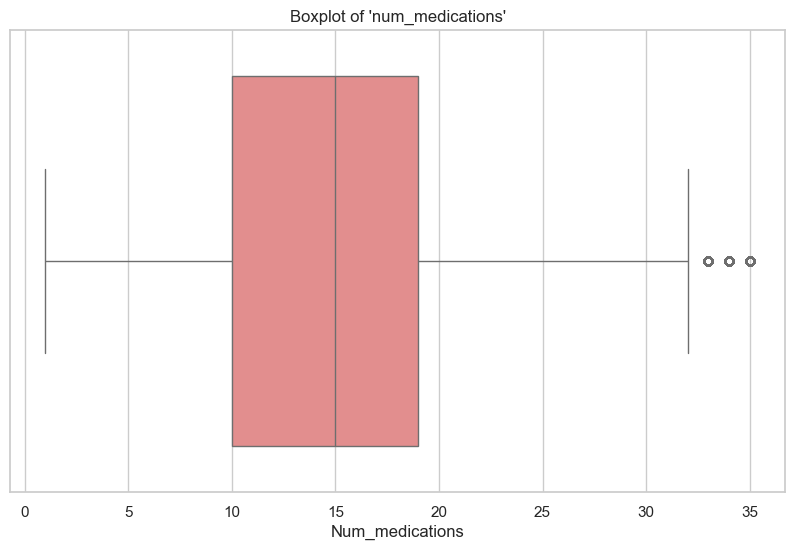

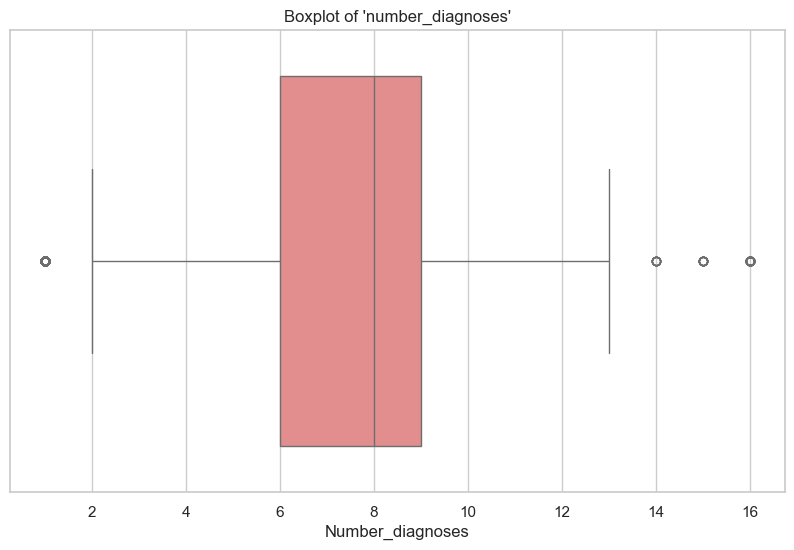

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style
sns.set(style="whitegrid")

# Target Variable Analysis
print("\n--- Target Variable Analysis: 'readmitted' ---\n")
readmitted_counts = cleaned_diabetic_data['readmitted'].value_counts()
print(readmitted_counts)

# Plot distribution of 'readmitted'
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_diabetic_data, x='readmitted', order=readmitted_counts.index, palette="viridis")
plt.title("Distribution of 'readmitted' Categories")
plt.xlabel("Readmission Status")
plt.ylabel("Count")
plt.show()

# Analyze Categorical Features
categorical_features = ['race', 'gender', 'admission_type_id', 'weight', 'medical_specialty']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=cleaned_diabetic_data, x=feature, palette="coolwarm",
                  order=cleaned_diabetic_data[feature].value_counts().index)
    plt.title(f"Distribution of '{feature}'")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Analyze Numerical Features
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(cleaned_diabetic_data[feature], kde=True, color="steelblue", bins=30)
    plt.title(f"Distribution of '{feature}'")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frequency")
    plt.show()

# Boxplots for Outlier Identification in Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cleaned_diabetic_data, x=feature, color="lightcoral")
    plt.title(f"Boxplot of '{feature}'")
    plt.xlabel(feature.capitalize())
    plt.show()

<Figure size 1000x600 with 0 Axes>

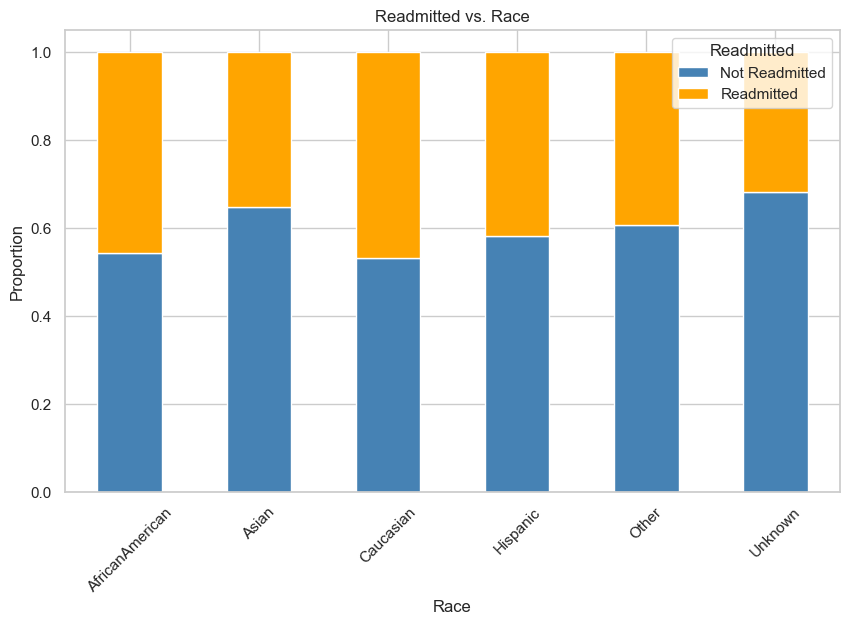

<Figure size 1000x600 with 0 Axes>

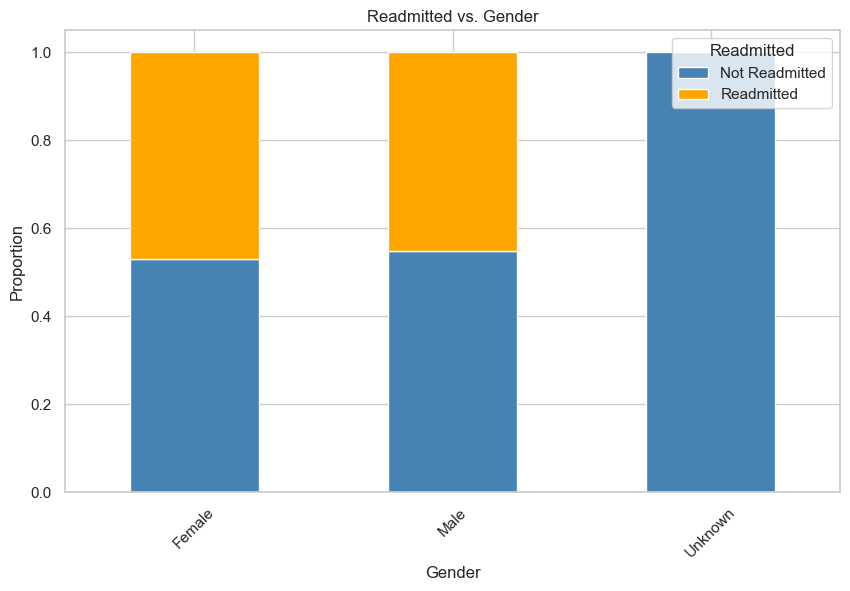

<Figure size 1000x600 with 0 Axes>

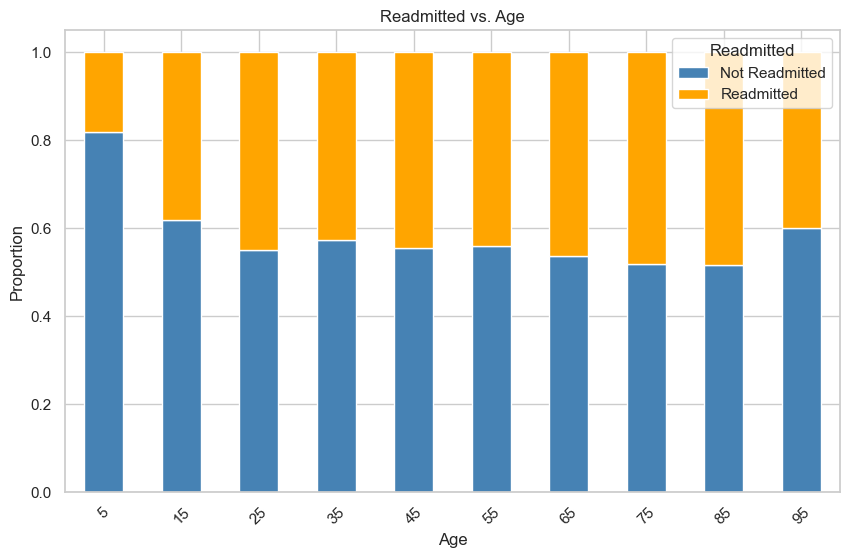

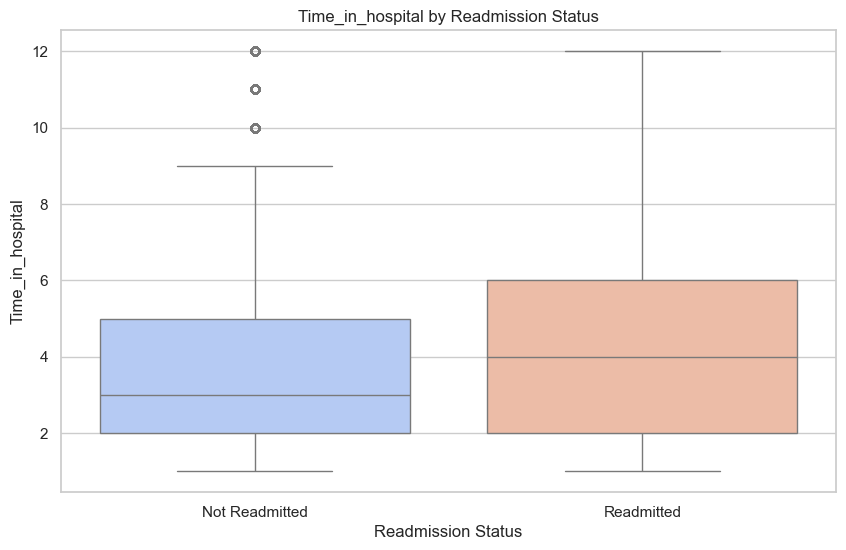

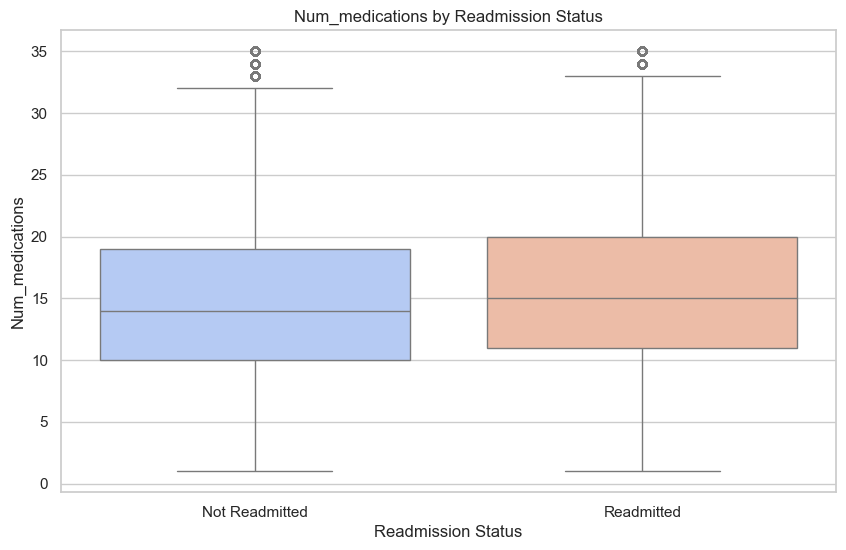

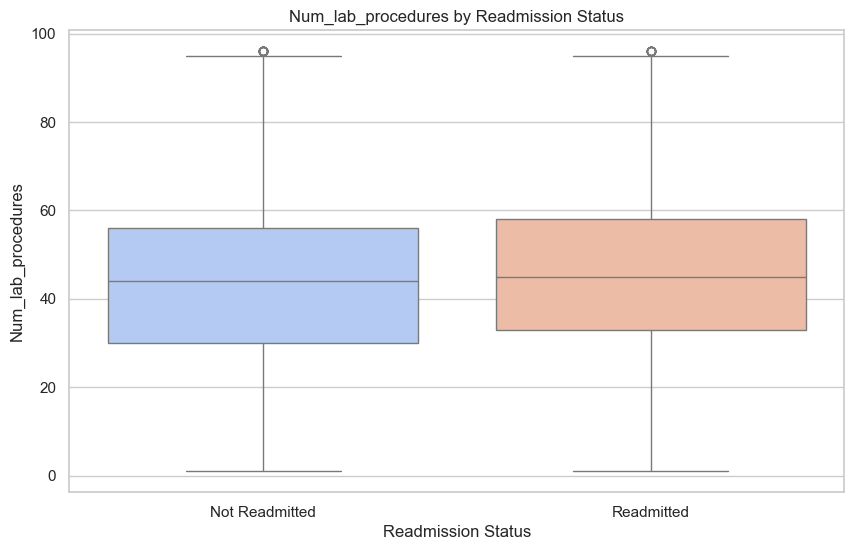

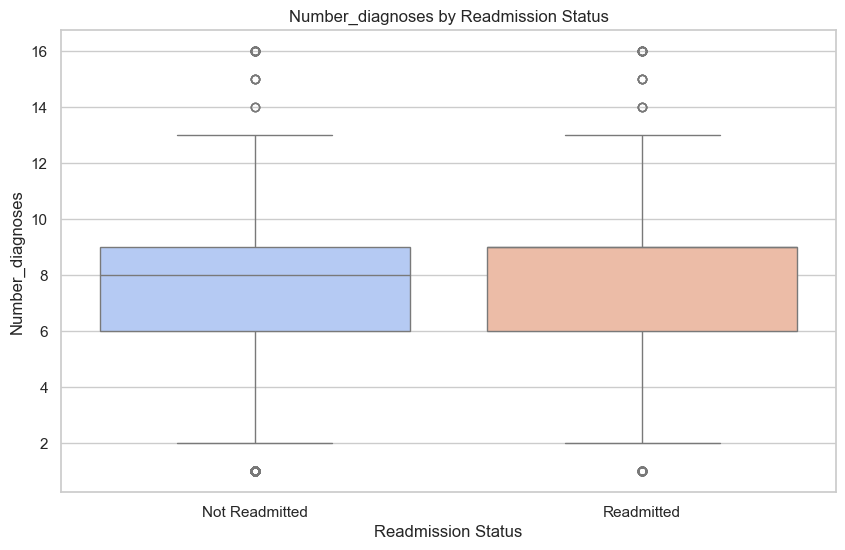

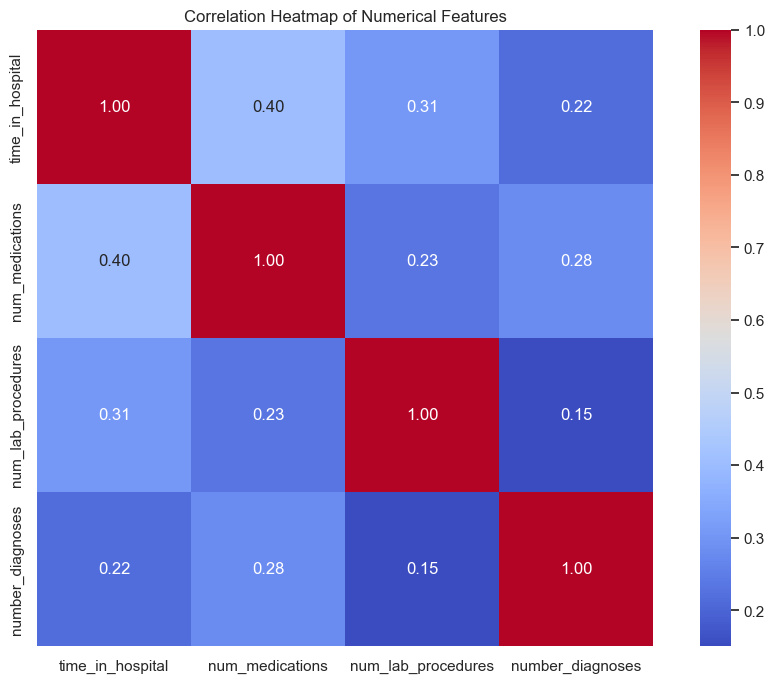

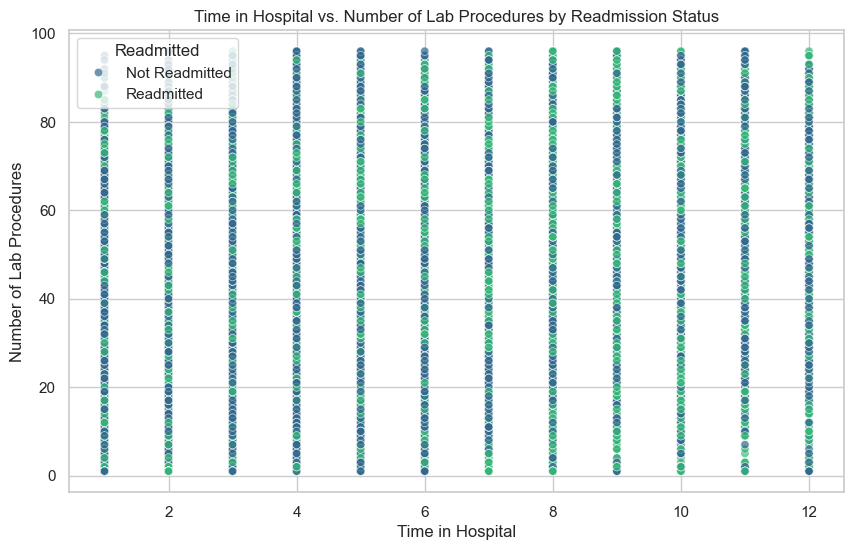

In [11]:
# Set up Seaborn style for consistency
sns.set(style="whitegrid")

# Bivariate Analysis: Target vs. Features

# 1. Categorical vs. Target (Stacked Bar Charts)
categorical_features = ['race', 'gender', 'age']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    crosstab = pd.crosstab(cleaned_diabetic_data[feature], cleaned_diabetic_data['readmitted'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, color=['steelblue', 'orange'], figsize=(10, 6))
    plt.title(f"Readmitted vs. {feature.capitalize()}")
    plt.ylabel("Proportion")
    plt.xlabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.legend(title='Readmitted')
    plt.show()

# 2. Numerical vs. Target (Boxplots)
numerical_features = ['time_in_hospital', 'num_medications', 'num_lab_procedures', 'number_diagnoses']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cleaned_diabetic_data, x='readmitted', y=feature, palette="coolwarm")
    plt.title(f"{feature.capitalize()} by Readmission Status")
    plt.xlabel("Readmission Status")
    plt.ylabel(feature.capitalize())
    plt.show()

# 3. Correlation Heatmap: Numerical Features
plt.figure(figsize=(12, 8))
correlation_matrix = cleaned_diabetic_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 4. Pairwise Interaction: time_in_hospital vs. num_lab_procedures
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_diabetic_data, x='time_in_hospital', y='num_lab_procedures', hue='readmitted', palette="viridis", alpha=0.7)
plt.title("Time in Hospital vs. Number of Lab Procedures by Readmission Status")
plt.xlabel("Time in Hospital")
plt.ylabel("Number of Lab Procedures")
plt.legend(title="Readmitted")
plt.show()


--- Missing Data Summary ---

                   Missing Count  Missing Proportion (%)
weight                     98569               96.858479
payer_code                 40256               39.557416
medical_specialty          49949               49.082208


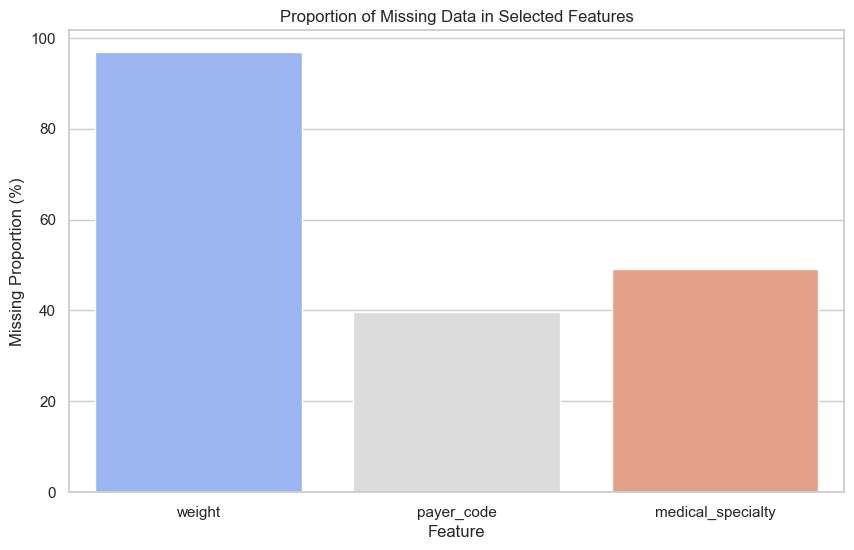

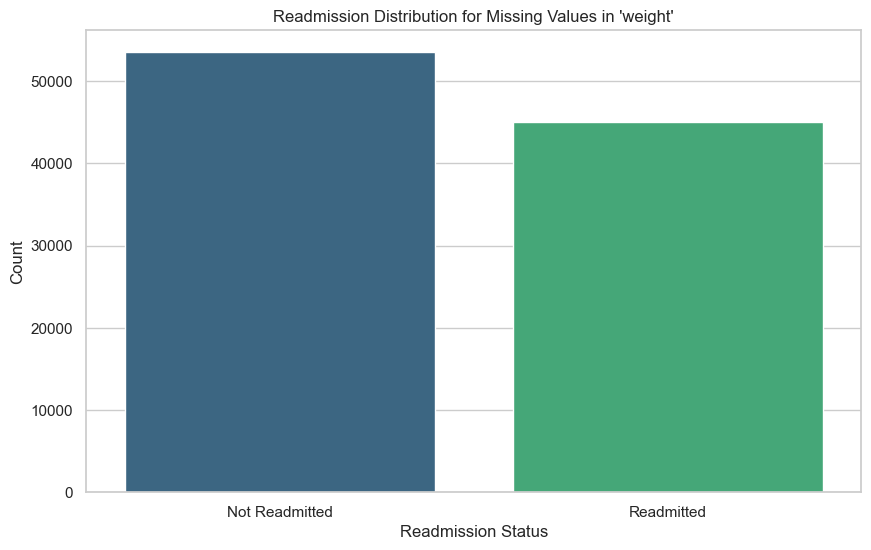

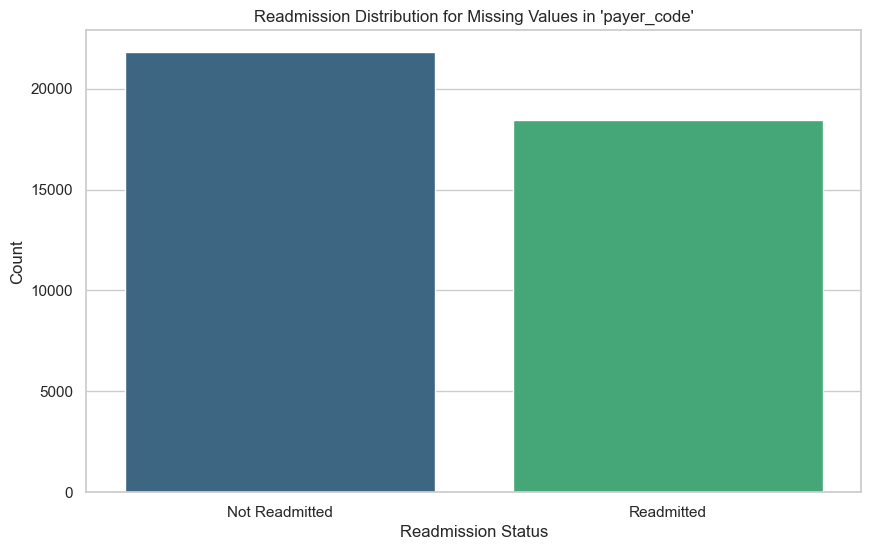

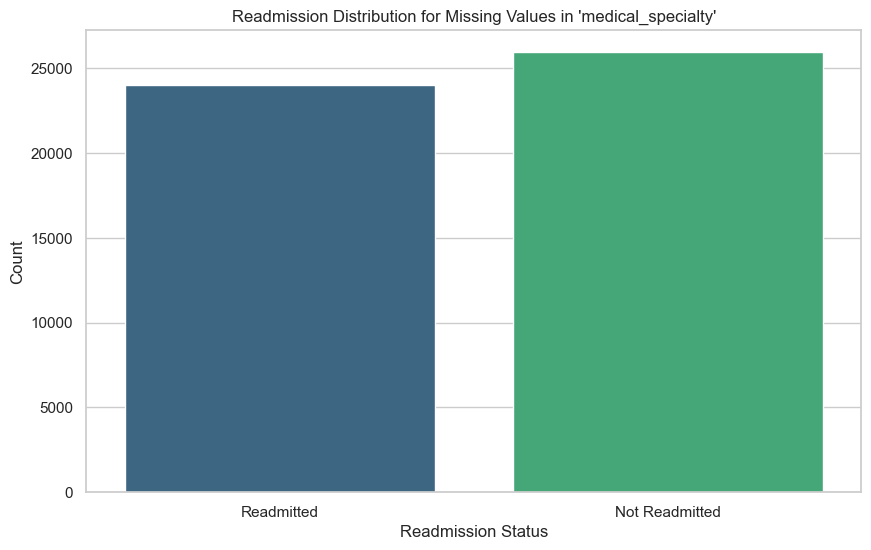

In [15]:
# Step 4: Missing Value Analysis

# Analyze Missing Data Distribution
missing_columns = ['weight', 'payer_code', 'medical_specialty']
missing_summary = cleaned_diabetic_data[missing_columns].apply(lambda col: col.isin(['Unknown', '?']).sum())

# Proportion of Missing Data
total_rows = len(cleaned_diabetic_data)
missing_proportions = (missing_summary / total_rows) * 100

# Display Missing Data Summary
missing_data_summary = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Proportion (%)': missing_proportions
})
print("\n--- Missing Data Summary ---\n")
print(missing_data_summary)

# Visualize Missing Data Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data_summary.index, y=missing_data_summary['Missing Proportion (%)'], palette="coolwarm")
plt.title("Proportion of Missing Data in Selected Features")
plt.ylabel("Missing Proportion (%)")
plt.xlabel("Feature")
plt.show()

# Analyze Missing Data and Readmission Relationship
for column in missing_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=cleaned_diabetic_data[cleaned_diabetic_data[column].isin(['Unknown', '?'])],
        x='readmitted',
        palette="viridis"
    )
    plt.title(f"Readmission Distribution for Missing Values in '{column}'")
    plt.xlabel("Readmission Status")
    plt.ylabel("Count")
    plt.show()


--- Updated Dataset Structure ---

    weight  weight_provided  lab_med_interaction  age age_group
0  Unknown                0                   41    5      0-30
1  Unknown                0                 1062   15      0-30
2  Unknown                0                  143   25      0-30
3  Unknown                0                  704   35     30-60
4  Unknown                0                  408   45     30-60


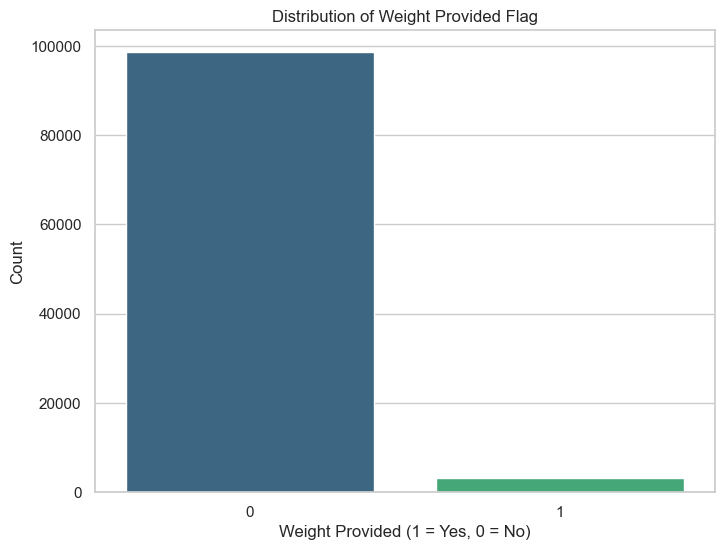

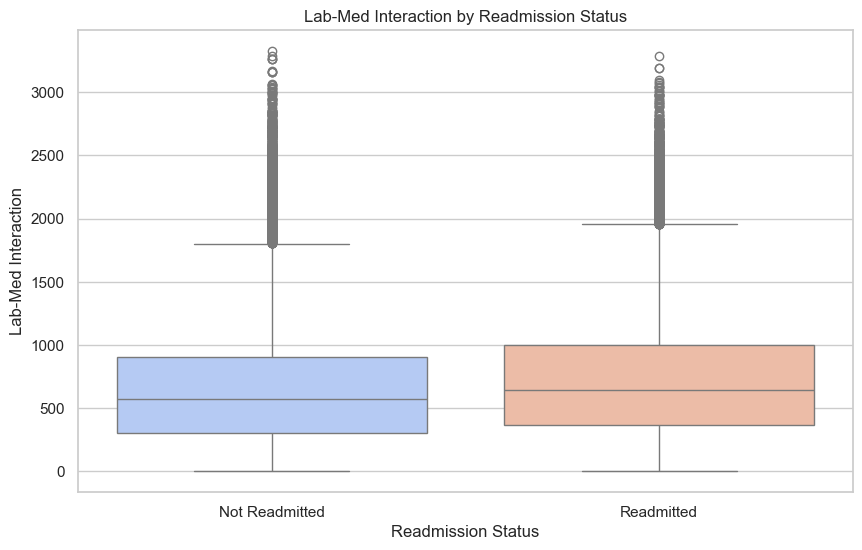

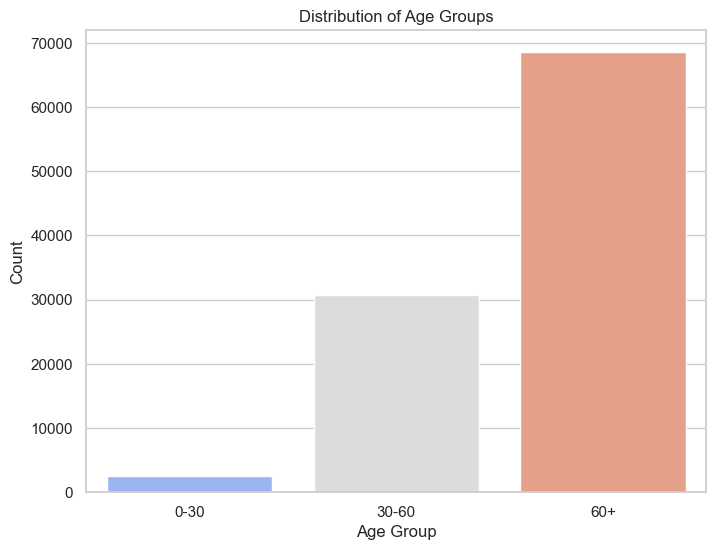

In [17]:
# Step 6: Feature Engineering

# 1. Binary flag for weight provided
cleaned_diabetic_data['weight_provided'] = cleaned_diabetic_data['weight'].apply(lambda x: 0 if x == 'Unknown' else 1)

# 2. Interaction term: num_lab_procedures × num_medications
cleaned_diabetic_data['lab_med_interaction'] = cleaned_diabetic_data['num_lab_procedures'] * cleaned_diabetic_data['num_medications']

# 3. Grouping age into bins: [0-30), [30-60), [60+)]
age_bins = [0, 30, 60, 100]
age_labels = ['0-30', '30-60', '60+']
cleaned_diabetic_data['age_group'] = pd.cut(cleaned_diabetic_data['age'], bins=age_bins, labels=age_labels, right=False)

# Display updated dataset structure
print("\n--- Updated Dataset Structure ---\n")
print(cleaned_diabetic_data[['weight', 'weight_provided', 'lab_med_interaction', 'age', 'age_group']].head())

# Visualize new features
# Distribution of weight_provided
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_diabetic_data, x='weight_provided', palette='viridis')
plt.title("Distribution of Weight Provided Flag")
plt.xlabel("Weight Provided (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Boxplot of interaction term by readmitted status
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_diabetic_data, x='readmitted', y='lab_med_interaction', palette="coolwarm")
plt.title("Lab-Med Interaction by Readmission Status")
plt.xlabel("Readmission Status")
plt.ylabel("Lab-Med Interaction")
plt.show()

# Distribution of age_group
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_diabetic_data, x='age_group', palette='coolwarm', order=age_labels)
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

<Figure size 1200x600 with 0 Axes>

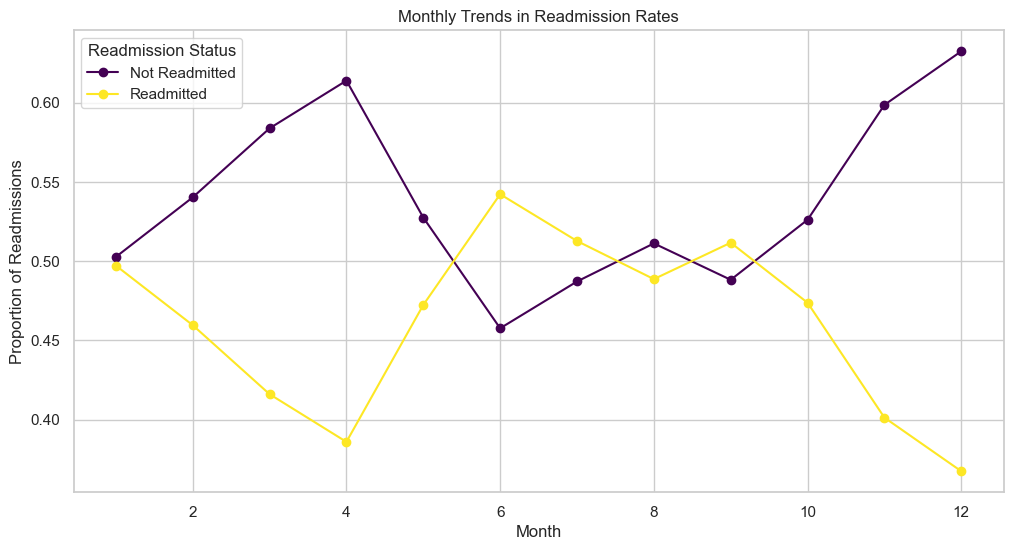

<Figure size 1200x600 with 0 Axes>

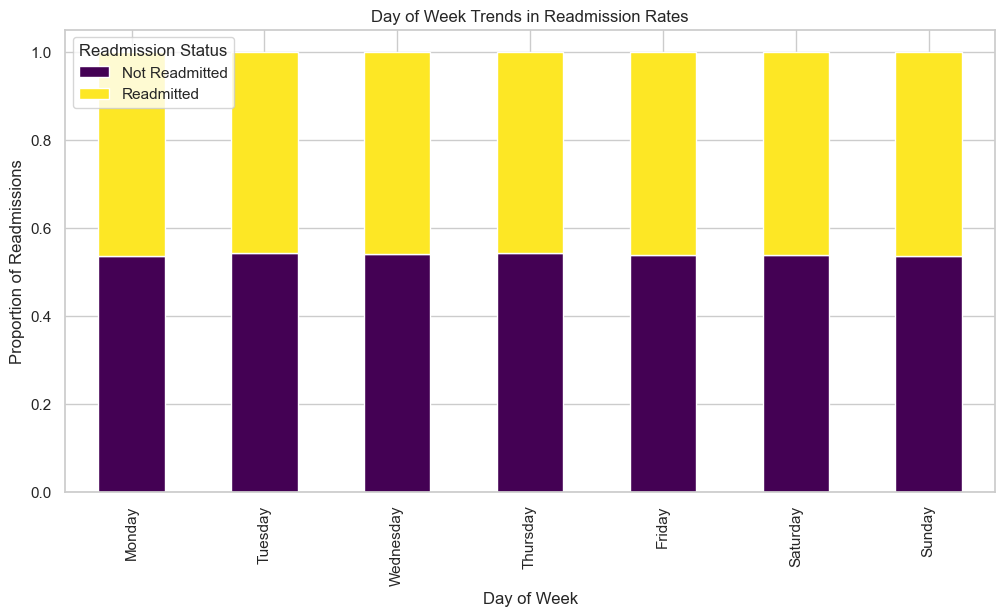

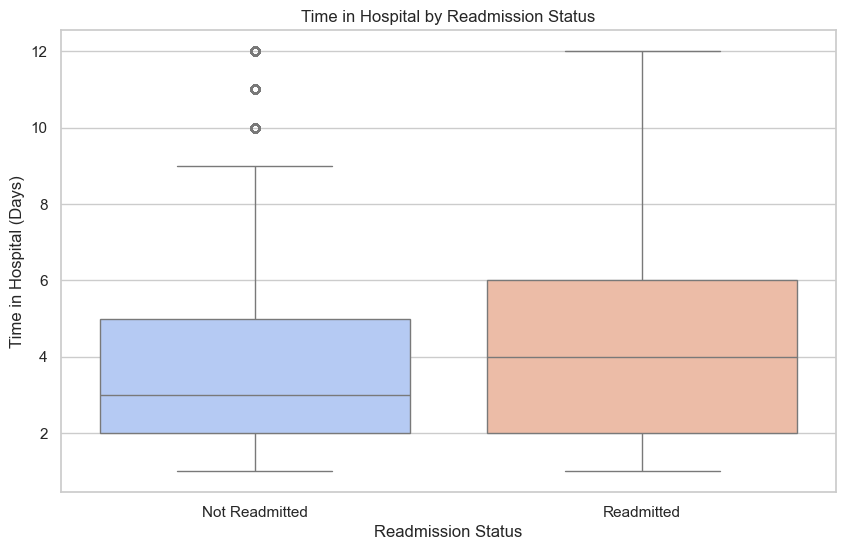

In [19]:
# Simulate cyclic admission dates within a year for temporal analysis
cleaned_diabetic_data['admission_date'] = pd.date_range(
    start='2023-01-01', periods=365, freq='D'
).repeat(len(cleaned_diabetic_data) // 365 + 1)[:len(cleaned_diabetic_data)]

# Extract month and day of the week for temporal analysis
cleaned_diabetic_data['month'] = cleaned_diabetic_data['admission_date'].dt.month
cleaned_diabetic_data['day_of_week'] = cleaned_diabetic_data['admission_date'].dt.day_name()

# Monthly variation in readmission
monthly_readmission = cleaned_diabetic_data.groupby('month')['readmitted'].value_counts(normalize=True).unstack()

# Plot monthly trends
plt.figure(figsize=(12, 6))
monthly_readmission.plot(kind='line', marker='o', figsize=(12, 6), cmap="viridis")
plt.title("Monthly Trends in Readmission Rates")
plt.xlabel("Month")
plt.ylabel("Proportion of Readmissions")
plt.legend(title="Readmission Status")
plt.show()

# Weekly variation in readmission
weekly_readmission = cleaned_diabetic_data.groupby('day_of_week')['readmitted'].value_counts(normalize=True).unstack()

# Plot weekly trends
plt.figure(figsize=(12, 6))
weekly_readmission.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot(
    kind='bar', stacked=True, figsize=(12, 6), colormap="viridis"
)
plt.title("Day of Week Trends in Readmission Rates")
plt.xlabel("Day of Week")
plt.ylabel("Proportion of Readmissions")
plt.legend(title="Readmission Status", loc='upper left')
plt.show()

# Analyze time_in_hospital effect on readmission trends
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_diabetic_data, x='readmitted', y='time_in_hospital', palette="coolwarm")
plt.title("Time in Hospital by Readmission Status")
plt.xlabel("Readmission Status")
plt.ylabel("Time in Hospital (Days)")
plt.show()


--- PCA Explained Variance Ratio ---

Principal Component 1: 45.23%
Principal Component 2: 21.67%


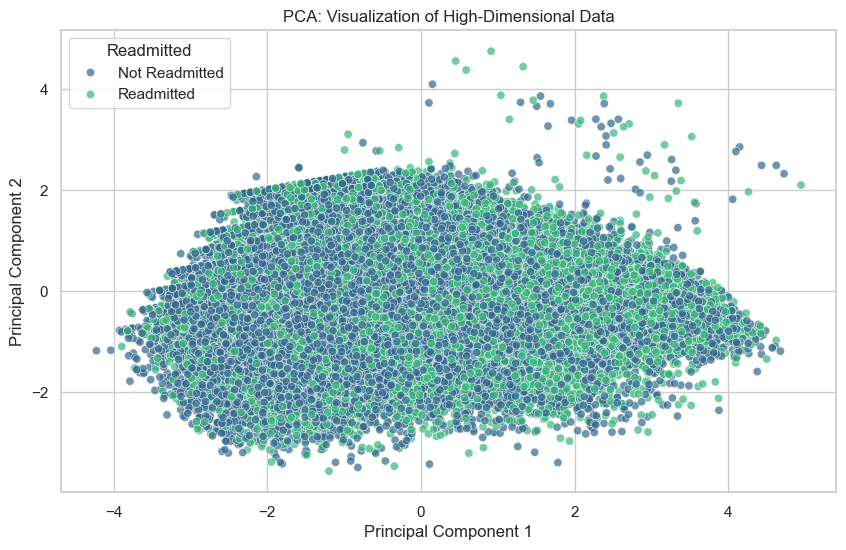

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']
scaled_data = StandardScaler().fit_transform(cleaned_diabetic_data[numerical_features])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the dataset
cleaned_diabetic_data['PCA1'] = pca_result[:, 0]
cleaned_diabetic_data['PCA2'] = pca_result[:, 1]

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("\n--- PCA Explained Variance Ratio ---\n")
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.2%}")

# Visualize PCA Results with Readmission Status
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cleaned_diabetic_data,
    x='PCA1',
    y='PCA2',
    hue='readmitted',
    palette="viridis",
    alpha=0.7
)
plt.title("PCA: Visualization of High-Dimensional Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Readmitted")
plt.show()


--- Readmitted Class Distribution ---

readmitted
Not Readmitted    54864
Readmitted        46902
Name: count, dtype: int64

--- Readmitted Class Proportions ---

readmitted
Not Readmitted    0.539119
Readmitted        0.460881
Name: count, dtype: float64


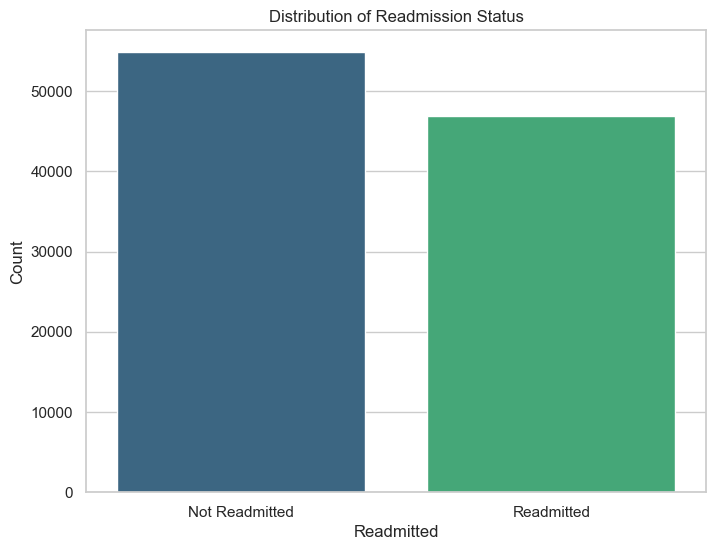


No significant class imbalance detected.


In [23]:
from collections import Counter

# Step 9: Class Imbalance Analysis

# Check for imbalances in the 'readmitted' variable
readmitted_counts = cleaned_diabetic_data['readmitted'].value_counts()
readmitted_proportions = readmitted_counts / len(cleaned_diabetic_data)

# Display counts and proportions
print("\n--- Readmitted Class Distribution ---\n")
print(readmitted_counts)
print("\n--- Readmitted Class Proportions ---\n")
print(readmitted_proportions)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_diabetic_data, x='readmitted', palette="viridis")
plt.title("Distribution of Readmission Status")
plt.xlabel("Readmitted")
plt.ylabel("Count")
plt.show()

# Recommendations based on class imbalance
if readmitted_proportions.min() < 0.4:
    print("\nClass imbalance detected. Consider using methods like oversampling, undersampling, or SMOTE.")
else:
    print("\nNo significant class imbalance detected.")

In [27]:
# Reimport LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Reinitialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features for mutual information
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature].astype(str))

# Calculate mutual information
mutual_info = mutual_info_classif(X, cleaned_diabetic_data['readmitted_encoded'], discrete_features=[X.columns.get_loc(col) for col in categorical_features])

# Create a DataFrame for ranking
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

print("\n--- Feature Importance via Mutual Information ---\n")
print(feature_importance)

NameError: name 'X' is not defined